<a href="https://colab.research.google.com/github/Rafi653/Machine-Learning/blob/feature%2Flab2/ML_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 4.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [37]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook

In [38]:
from google.colab import files
file = files.upload()
train_df = pd.read_excel('Lab3_data.xls', sheet_name='2004--2005 Data')


# file = files.upload()
# train_df = pd.read_excel('Lab3_data.xls', sheet_name='2004--2005 Data')


Saving Lab3_data.xls to Lab3_data (3).xls


In [3]:
train_df.head()

,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [39]:
class LogisticRegression:
  def __init__(self, X, y, learningRate, tolerance, maxIteration) -> None:
      self.X = X
      self.y = y
      self.learningRate  = learningRate
      self.tolerance = tolerance
      self.maxIteration = maxIteration
      self.w = 1


  def addX0(self, X):
    return np.column_stack([np.ones([X.shape[0]]), X])

  def sigmoid(self,z):
    sig = 1 / (1 + np.exp(-z))
    return sig

  def costFunction(self, X, y):
    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w).dot(y)))
    cost = pred_.sum()
    return cost

  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))

    grad = (sig - y).dot(X)
    return grad

  def gradientDescent(self, X, y):
    errors = []
    last = float('inf')

    for i in tqdm_notebook(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient(X, y)
      curr = self.costFunction(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
        print("Model stopped")
        break

    self.plot_cost(errors)


  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = (y & y_hat).sum() / y_hat.sum()

    recall = (y & y_hat).sum() / y.sum()

    fScore = 2 * (precision*recall) / (precision+recall)

    return fScore, recall, precision

  def run_model(self):
    self.X_train = self.X
    self.y_train = self.y
    
    self.w = np.ones(self.X.shape[1], dtype=np.float64) * 0
    self.gradientDescent(self.X, self.y)

    print(self.w)

    y_hat_train = self.predict(self.X)
    fScore, recall, precision = self.evaluate(self.y, y_hat_train)

    print('F1_score is:', fScore)
    print('Precision is:', precision)
    print('Recall is:', recall)


  def plot(self):
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection='3d')

    # Data for three-dimensional scattered points
    ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                  self.sigmoid(self.X_train.dot(self.w)), 
                  c = self.y_train[:], cmap='viridis', s=100);

    ax.set_xlim3d(55, 80)
    ax.set_ylim3d(80, 240)
    plt.xlabel('$x_1$ feature', fontsize=15)
    plt.ylabel('$x_2$ feature', fontsize=15, )
    ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
  def scatterPlt(self):
    # evenly sampled points
    x_min, x_max = 55, 80
    y_min, y_max = 80, 240

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                          np.linspace(y_min, y_max, 250))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = grid.dot(self.w).reshape(xx.shape)

    f, ax = plt.subplots(figsize=(14,12))


    ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


    ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                c=self.y_train[:], s=50,
                cmap="RdBu", vmin=-.2, vmax=1.2,
                edgecolor="white", linewidth=1)

    plt.xlabel('x1 feature')
    plt.ylabel('x2 feature')
      

  def plot3D(self):
    # evenly sampled points
    x_min, x_max = 55, 80
    y_min, y_max = 80, 240
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                          np.linspace(y_min, y_max, 250))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = grid.dot(self.w).reshape(xx.shape)
    fig = plt.figure(figsize=(14,12))
    ax = plt.axes(projection='3d')
    ax.contour3D(xx, yy, probs, 50, cmap='binary')

    ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                c=self.y_train[:], s=50,
                cmap="RdBu", vmin=-.2, vmax=1.2,
                edgecolor="white", linewidth=1)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('probs')
    ax.set_title('3D contour')
    plt.show()

  def plot_cost(self, cost_sequence):
    # Data for plotting
    s = np.array(cost_sequence)
    t = np.arange(s.size)

    fig, ax = plt.subplots()
    ax.plot(t, s)

    ax.set(xlabel='iterations', ylabel='cost',
            title='cost trend')
    ax.grid()

    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()


      







In [40]:
train_X, train_y = train_df.values[:,1:], train_df.values[:, 0]

In [41]:
lr = LogisticRegression(train_X, 
                        train_y,
                        learningRate= 0.000001,
                        tolerance= 0.0000005,
                        maxIteration= 50000,
                        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/50000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


Model stopped


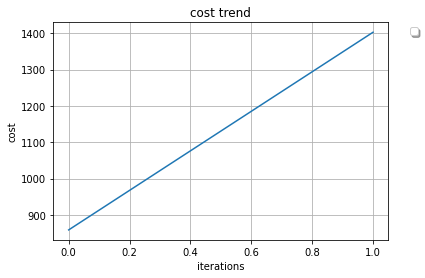

[0.00152956 0.00419966]
F1_score is: 0.878048780487805
Precision is: 0.782608695652174
Recall is: 1.0


In [42]:
lr.run_model()

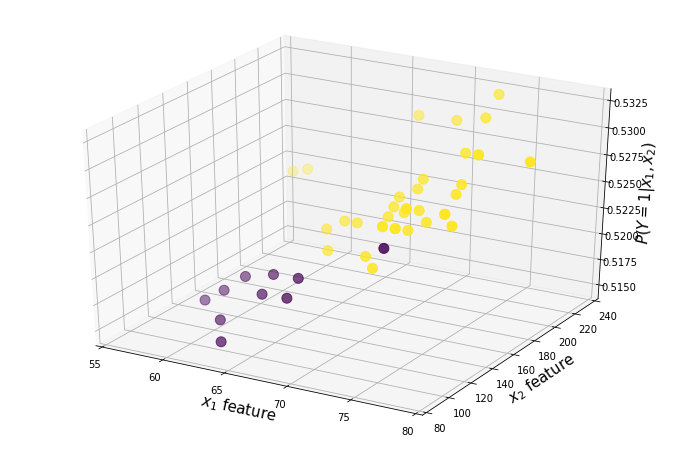

In [30]:
lr.plot()

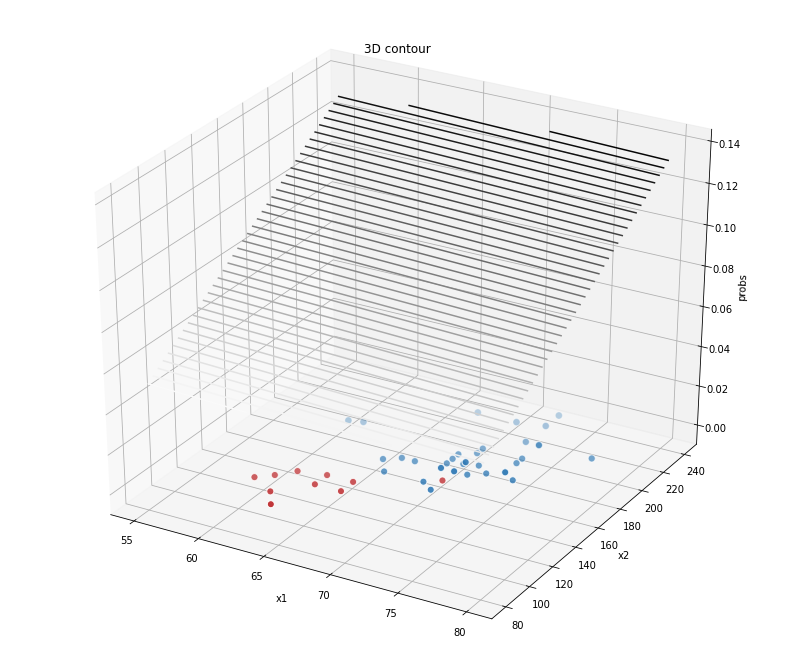

In [31]:
lr.plot3D()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: UserWarning: No contour levels were found within the data range.


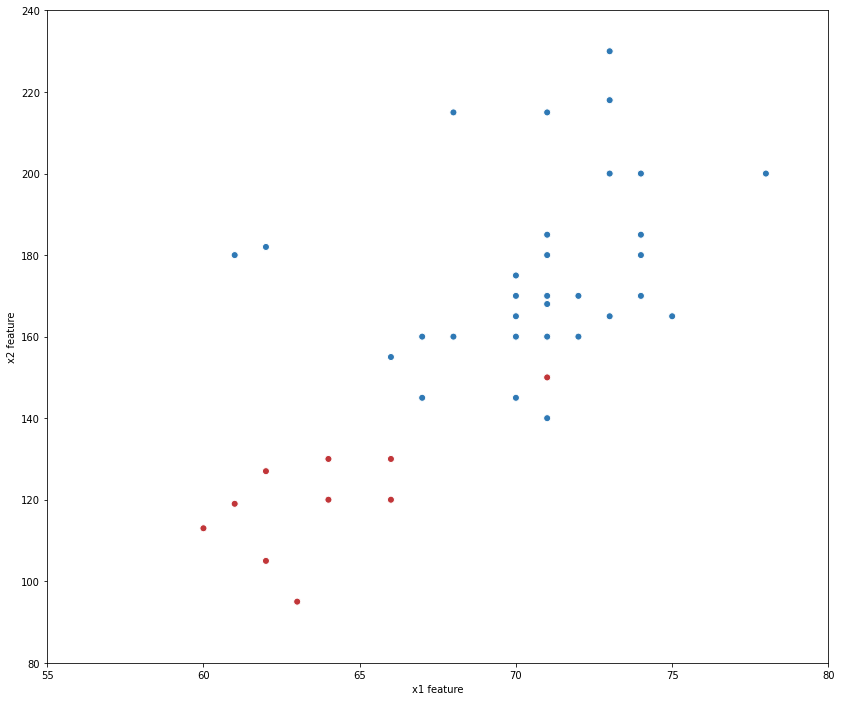

In [32]:
lr.scatterPlt()